# Lab8 Vector Analysis III
----------------------------------

# HOMEWORK ASSIGNMENT

**Answer the following questions in the jupyter notebook file. (You can also use other IDEs to test your code) **

## 1. Tutorial 1 (30 points)

Follow the __tutorial__ at https://github.com/geopandas/geopandas/blob/master/examples/overlays.ipynb to overlay layers using geopandas.

The cmap = 'tab20b' may not exist depends on your matplotlib version, you can change the cmap to 'Set1' instead in the tutorial. 

Retype the code from the tutorial in this notebook and produce the outputs in this notebook.

In [72]:
from IPython.core.display import Image
Image(url="http://docs.qgis.org/testing/en/_images/overlay_operations.png")

In [73]:
%matplotlib inline
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay

# NYC Boros
zippath = datasets.get_path('nybb')
polydf = read_file(zippath)

# Generate some circles
b = [int(x) for x in polydf.total_bounds]
N = 10
polydf2 = GeoDataFrame([
    {'geometry': Point(x, y).buffer(10000), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))])

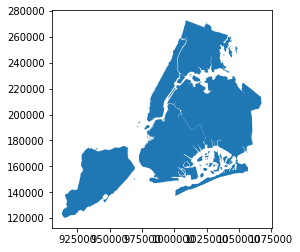

In [74]:
polydf.plot()

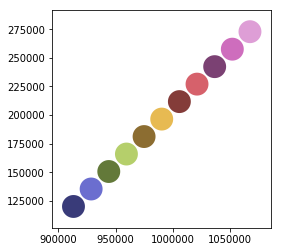

In [75]:
polydf2.plot(cmap='tab20b')

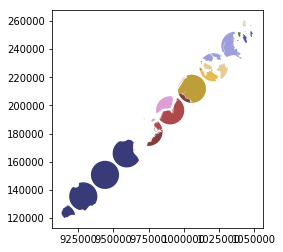

In [76]:
from geopandas.tools import overlay
newdf = overlay(polydf, polydf2, how="intersection")
newdf.plot(cmap='tab20b')

In [77]:
polydf.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  (POLYGON ((970217.0223999023 145643.3322143555...  
1  (POLYGON ((1029606.076599121 156073.8142089844...  
2  (POLYGON ((1021176.479003906 151374.7969970703...  
3  (POLYGON ((981219.0557861328 188655.3157958984...  
4  (POLYGON ((1012821.805786133 229228.2645874023...

In [78]:
polydf2.head()

geometry   value1  value2
0  POLYGON ((923175 120121, 923126.847266722 1191...  1033296  793054
1  POLYGON ((938595 135393, 938546.847266722 1344...  1063988  793202
2  POLYGON ((954015 150665, 953966.847266722 1496...  1094680  793350
3  POLYGON ((969435 165937, 969386.847266722 1649...  1125372  793498
4  POLYGON ((984855 181209, 984806.847266722 1802...  1156064  793646

In [79]:
newdf.head()

BoroCode       BoroName     Shape_Leng    Shape_Area   value1  value2  \
0         5  Staten Island  330470.010332  1.623820e+09  1033296  793054   
1         5  Staten Island  330470.010332  1.623820e+09  1063988  793202   
2         5  Staten Island  330470.010332  1.623820e+09  1125372  793498   
3         5  Staten Island  330470.010332  1.623820e+09  1094680  793350   
4         2          Bronx  464392.991824  1.186925e+09  1309524  794386   

                                            geometry  
0  POLYGON ((916755.4256330276 129447.9617643995,...  
1  POLYGON ((938595 135393, 938546.847266722 1344...  
2  POLYGON ((961436.3049926758 175473.0296020508,...  
3  POLYGON ((954015 150665, 953966.847266722 1496...  
4  POLYGON ((1043287.193237305 260300.0289916992,...

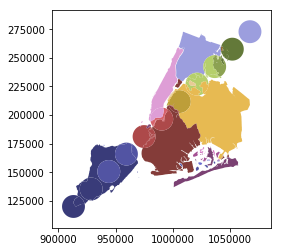

In [80]:
newdf = overlay(polydf, polydf2, how="union")
newdf.plot(cmap='tab20b')

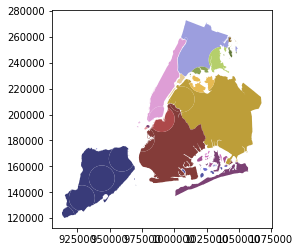

In [81]:
newdf = overlay(polydf, polydf2, how="identity")
newdf.plot(cmap='tab20b')

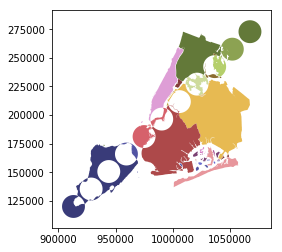

In [82]:
newdf = overlay(polydf, polydf2, how="symmetric_difference")
newdf.plot(cmap='tab20b')

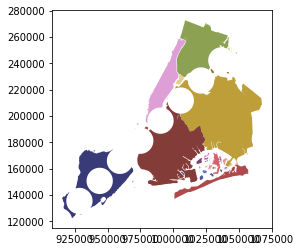

In [83]:
newdf = overlay(polydf, polydf2, how="difference")
newdf.plot(cmap='tab20b') 

## 2. Tutorial 2 (20 points)

Follow the __tutorial__ at http://geopandas.org/geometric_manipulations.html#examples-of-geometric-manipulations to practice the geometric manipulations using geopandas. 

Retype the code from the tutorial in this notebook and produce the final map in this notebook.

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona
%matplotlib inline

p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
#g['geometry']=None
#g = GeoSeries([p1, p2, p3])
g = gpd.GeoSeries([p1, p2, p3])
g

0         POLYGON ((0 0, 1 0, 1 1, 0 0))
1    POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
2    POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: object

In [3]:
print g.area

0    0.5
1    1.0
2    1.0
dtype: float64


In [4]:
g.buffer(0.5)

0    POLYGON ((-0.3535533905932737 0.35355339059327...
1    POLYGON ((-0.5 0, -0.5 1, -0.4975923633360985 ...
2    POLYGON ((1.5 0, 1.5 1, 1.502407636663901 1.04...
dtype: object

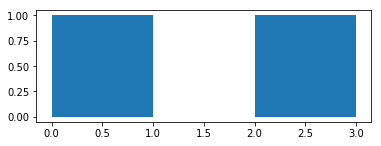

In [5]:
g.plot()

In [9]:
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.GeoDataFrame.from_file(nybb_path)
boros = boros.set_index('BoroCode')
boros = boros.sort_index()
boros

BoroName     Shape_Leng    Shape_Area  \
BoroCode                                               
1             Manhattan  359299.096471  6.364715e+08   
2                 Bronx  464392.991824  1.186925e+09   
3              Brooklyn  741080.523166  1.937479e+09   
4                Queens  896344.047763  3.045213e+09   
5         Staten Island  330470.010332  1.623820e+09   

                                                   geometry  
BoroCode                                                     
1         (POLYGON ((981219.0557861328 188655.3157958984...  
2         (POLYGON ((1012821.805786133 229228.2645874023...  
3         (POLYGON ((1021176.479003906 151374.7969970703...  
4         (POLYGON ((1029606.076599121 156073.8142089844...  
5         (POLYGON ((970217.0223999023 145643.3322143555...

In [10]:
boros['geometry'].convex_hull

BoroCode
1    POLYGON ((977855.4451904297 188082.3223876953,...
2    POLYGON ((1017949.977600098 225426.8845825195,...
3    POLYGON ((988872.8212280273 146772.0317993164,...
4    POLYGON ((1000721.531799316 136681.776184082, ...
5    POLYGON ((915517.6877458114 120121.8812543372,...
dtype: object

In [22]:
from shapely.geometry import Point
import numpy as np
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [23]:
circles = pts.buffer(2000)

In [24]:
mp = circles.unary_union

In [25]:
holes = boros['geometry'].intersection(mp)

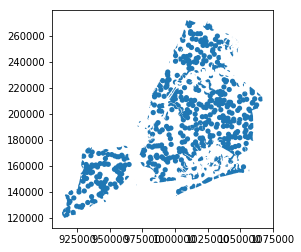

In [29]:
holes.plot()

In [26]:
boros_with_holes = boros['geometry'].difference(mp)

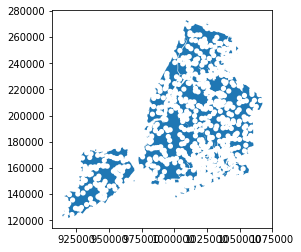

In [28]:
boros_with_holes.plot()

In [27]:
holes.area / boros.geometry.area

BoroCode
1    0.534499
2    0.562179
3    0.522631
4    0.603981
5    0.564905
dtype: float64

## 3. Aggregate Data (20 points)

Let’s aggregate the US states data by subregion.

OBJECTID    STATE_NAME STATE_FIPS          SUB_REGION STATE_ABBR  POP2000  \
0         1        Hawaii         15             Pacific         HI  1211537   
1         2    Washington         53             Pacific         WA  5894121   
2         3       Montana         30            Mountain         MT   902195   
3         4         Maine         23         New England         ME  1274923   
4         5  North Dakota         38  West North Central         ND   642200   

   POP2010  POP00_SQMI  POP10_SQMI    WHITE  \
0  1309580       110.8       119.8   294102   
1  6756150        82.7        94.8  4821823   
2   983932         6.1         6.7   817229   
3  1338645        32.2        33.8  1236014   
4   662194         9.1         9.4   593181   

                         ...                          RENTER_OCC  NO_FARMS07  \
0                        ...                              175352      7521.0   
1                        ...                              804389     39284.0   
2                        ...                              110944     29524.0   
3                        ...                              147295      8136.0   
4                        ...                               85853     31970.0   

   AVG_SIZE07  CROP_ACR07  AVG_SALE07    SQMI    Shape_Leng    Shape_Area  \
0       149.0    177626.0       68.29   10931  1.275836e+06  1.651300e+10   
1       381.0   7609210.0      172.92   71297  3.004175e+06  1.644423e+11   
2      2079.0  18241710.0       94.94  147038  2.859079e+06  3.596622e+11   
3       166.0    529253.0       75.86   39555  1.804888e+06  7.838479e+10   
4      1241.0  27527180.0      190.31   70698  1.753454e+06  1.730721e+11   

   PopChange                                           geometry  
0      98043  (POLYGON ((-6020138.5395 218107.4453999996, -6...  
1     862029  (POLYGON ((-1827831.409800001 1181178.1646, -1...  
2      81737  POLYGON ((-1147669.153299999 620212.8911000006...  
3      63722  (POLYGON ((1946992.1252 735230.8208000008, 194...  
4      19994  POLYGON ((-199316.4343999997 662687.5321999993...  

[5 rows x 53 columns]

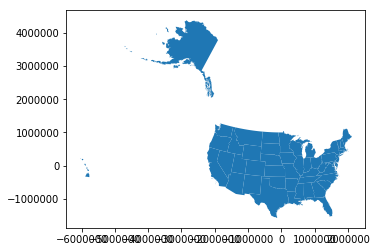

In [100]:
# Import necessary modules, e.g geopandas
import geopandas as gpd
# %matplotlib inline
%matplotlib inline
import shapely.speedups
shapely.speedups.disable()

# Read file USStates.shp in data folder using gpd.read_file()
usstates = gpd.read_file(r"C:\Users\casca\Downloads\SimpleAccess\L8\Data\USStates.shp")
# check the data using .plot(), .head()
usstates.plot()
usstates.head()

In [101]:
# select a few columns('STATE_NAME','SUB_REGION','POP2010','geometry') for aggregation
usstates = usstates.loc[:,('STATE_NAME','SUB_REGION','POP2010','geometry')]
#usstates.head()

In [102]:
# Let’s aggregate the states by sub_region using dissolve(),
# you also need to sum up the Population in 2010 (POP2010) for the states in each subregion.
# hint: use .dissolve(by = ?, aggfunc = ‘sum’)
subregions = usstates.dissolve(by = 'SUB_REGION', aggfunc = 'sum')
#subregions.plot()
subregions.head()

geometry  \
SUB_REGION                                                              
East North Central  (POLYGON ((534519.2663999982 832031.5814999994...   
East South Central  POLYGON ((698143.1281000003 -1036601.7864, 698...   
Middle Atlantic     (POLYGON ((1786481.4366 293776.4224999994, 178...   
Mountain            POLYGON ((-586725.2767000012 -310595.311100000...   
New England         (POLYGON ((2036971.726399999 797883.3990000002...   

                     POP2010  
SUB_REGION                    
East North Central  47020813  
East South Central  18438179  
Middle Atlantic     40940511  
Mountain            22621196  
New England         14444573

In [103]:
# compare the number of polygons before and after the aggregation
# hint: using len(DataFrame) function.
print len(usstates)
print len(subregions)

51
9


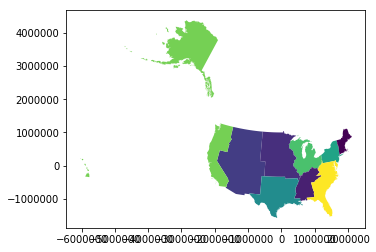

In [104]:
# create a choropleth map based on 'POP2010' column of the aggregated results.
# hint: GeoDataFrame.plot(column = ?)
# plot using one of the sequential colormaps 
# https://matplotlib.org/examples/color/colormaps_reference.html
subregions.plot(column = 'POP2010')


## 4. Highway Influence Area (30 points)

We want to investigate the percentage of highway influence area in each census tract in San Antonio, TX.

We will overlay the SA census tract layer and highway layer 1 mile buffer,  
then dissolve the highway, find the total area of highway influence area in each census tracts,  
then calculate the percentage.

In [105]:
# %matplotlib inline
# Import necessary modules
# e.g. geopandas as gpd;
import geopandas as gpd
%matplotlib inline

In [106]:
# Read file CensusTracts2000.shp and MajorHighways.shp
# in data folder using gpd.read_file()
ctSA = gpd.read_file(r"C:\Users\casca\Downloads\SimpleAccess\L8\Data\CensusTracts2000.shp")
hwSA = gpd.read_file(r"C:\Users\casca\Downloads\SimpleAccess\L8\Data\MajorHighways.shp")
# check the data using .head()


In [107]:
# create a 1-mile buffer around each highway using .buffer().
# because the unit is feet, so buffer distance is 5280.
hwbufferSA = hwSA.buffer(5280)


In [108]:
# use the GeoSeries.unary_union to union all the buffer into a single polygon
hwbufferSAPolygon = hwbufferSA.unary_union
# create a new GeoDataFrame of this buffer polygon
# check lecture 5 Task 3 for more details
hwbufferSAGDF['geometry'] = None
hwbufferSAGDF['geometry'] = hwbufferSAPolygon

#print hwbufferSAGDF
#hwbufferSAGDF['geometry']=None
#hwbufferSAGDF =
#gpd.GeoDataFrame(gpd.GeoSeries(env))

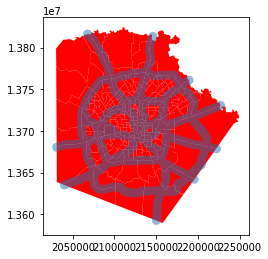

In [109]:
## plot the highway, highwaybuffer over the census tract to view all 3 datasets
## set the transparency to make sure all 3 datasets can be seen.
base = ctSA.plot(color='red')
hwbufferSAGDF.plot(ax=base, alpha = 0.5)



In [110]:
# Overlay the two layers (ctSA and hwbufferSAGDF) using intersection
hwbufferInCtSA = gpd.overlay(ctSA, hwbufferSAGDF, how = 'intersection')


In [111]:
# select a few columns for further analysis
hwbufferInCtSA=hwbufferInCtSA[['AREA','CENSUS_ID','geometry']]
hwbufferInCtSA.head()

AREA  CENSUS_ID                                           geometry
0  2.475992e+09         38  POLYGON ((2232382.54282784 13729511.87081694, ...
1  1.192961e+08         99  POLYGON ((2084787.250101061 13711132.99989178,...
2  7.662601e+07          2  POLYGON ((2085452.874933681 13712007.99995659,...
3  1.383990e+08          3  POLYGON ((2080763.124913313 13711220.99989186,...
4  9.122146e+07        226  POLYGON ((2153573.750005124 13711738.00008434,...

In [112]:
# dissolve the buffers based on CENSUS_ID
# hint: use .dissolve()
BufferPerCT = hwbufferInCtSA.dissolve(by = 'CENSUS_ID') 

In [113]:
# Add a column in BufferPerCT representing the percentage of highway influence area.
# hint: BufferPerCT.area/BufferPerCT['AREA']
BufferPerCT['PCT'] = BufferPerCT.area/BufferPerCT['AREA']

In [114]:
# Join with our original data (here index is the key for BufferPerCT, 
# 'CENSUS_ID' is the key for ctSA
ctSA_PCT = ctSA.merge(BufferPerCT[['AREA','PCT']], left_on = 'CENSUS_ID',right_index= True)
ctSA_PCT.head()

AREA_x      PERIMETER  CENSUS_  CENSUS_ID        ID        TRACT  \
0  1.369390e+09  182170.890625        2          8  101829.0  48029191600   
1  2.697313e+08   94908.164062        3        105   97563.0  48029182101   
2  1.449024e+09  250140.765625        4        168  212920.0  48029121901   
3  3.183353e+08  104477.304688        5        167  212824.0  48029191804   
4  2.334800e+08   77509.867188        6        104   97487.0  48029182102   

  COUNTY     NAME  POPULATION  \
0  48029     1916          16   
1  48029  1821.01        4215   
2  48029  1219.01        2331   
3  48029  1918.04        3486   
4  48029  1821.02        3294   

                                            geometry        AREA_y       PCT  
0  POLYGON ((2091755.499963551 13816856.99999024,...  1.369390e+09  0.014779  
1  POLYGON ((2067662.000037112 13816332.00005375,...  2.697313e+08  0.482254  
2  POLYGON ((2144946.749933089 13809617.9999195, ...  1.449024e+09  0.273874  
3  POLYGON ((2122630.000088305 13817844.99999116,...  3.183353e+08  0.121987  
4  POLYGON ((2062575.250080375 13814209.99992377,...  2.334800e+08  0.701579

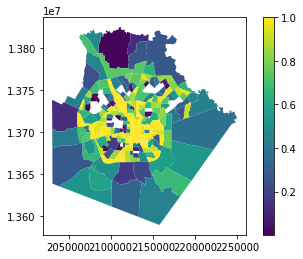

In [115]:
# plot a choropleth map based on the percentaage column. 
ctSA_PCT.plot(column = 'PCT', legend = True)